# Introduction
This project data comes from a Kaggle competition held in 2022 and can be found here https://www.kaggle.com/competitions/autismdiagnosis/overview
The data comes from a survey that had questions asked relating to certain attributes that people with Autism commonly display, then they were asked some demographic information about themselves. The purpose of this data is to create a model that could be used in theory with other participant data to get an idea to whether they should seek an ASD diagnosis or not. 

# Data

A1_Score - A10_Score: Questions asked in a survey, 1 being 'yes' and 0 being 'no'<br>
Age: Age in years<br>
gender: 0 for the person being a female and 1 if they are male<br>
Jaundice: 1 for if the person was diagnosed with Jaundice at birth and 0 if they weren't<br>
ASD_relative: 1 if they know of someone in their close relatives that was diagnosed with ASD during their lifetime<br>
result: Score for AQ1-10 screening test<br>
Class/ASD: Classified result as 0 or 1. 0 represents No and 1 represents Yes. This is the target column.<br>

# Data Cleaning

The majority of the data was already in the proper numerical format for the modeling process. There were no categorical columns in the original data. Most of the cleaning was converting 'no' and 'yes' to 0 and 1 respectively. There were a couple columns that were dropped due to there being too many missing values, only one unique value, or just not enough 'yes' values for the column to be of importance to us. After the dropping of the columns and renaming no and yes values, the data was ready to be explored. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
autism = pd.read_csv('train.csv')
autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


The columns that display little importance are dropped below. Age_desc are all the same category of '18 and more', the relation and used_app_before columns didn't have much varriance in the answers either, and the ethnicity column had too many missing values for it to be important.

In [3]:

autism = autism.drop(columns=['ID', 'ethnicity', 'contry_of_res', 'used_app_before', 'age_desc', 'relation'])
autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'austim', 'result', 'Class/ASD'],
      dtype='object')

The yes and no values need to be converted to 1 and 0 respectively. The gender column becomes 1 for male and 0 for female. 

In [4]:
autism.replace('yes', 1, inplace=True)
autism.replace('no', 0, inplace=True)
autism.replace('m', 1, inplace=True)
autism.replace('f', 0, inplace=True)
autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,0,0,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,0,0,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,0,1,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,0,0,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,0,0,-4.777286,0


In [5]:
X = autism.drop('Class/ASD', axis=1)
y = autism['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# EDA

For the A1 - A10 questions, most of them followed this similar trend which shows that people with autism tend to answer yes to the questions rather than no. This strengthens the validity of the questions that were created since this was their purpose.




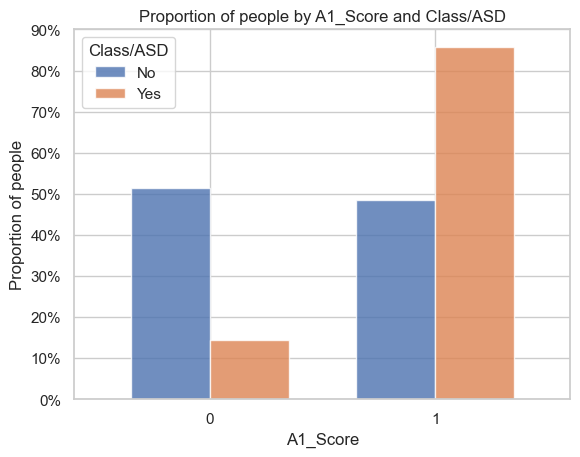

The figure below is made from the results column which is the score that the researchers gave the participants based on their answers to the questions given. It is apparent that pepole with autism in orange tended to have higher scores than those who didn't in blue. It is significant to point out that there were some participants who had really high scores but didn't report having autism. This could be because of misclassification on their own part, or they weren't properly diagnosed and the missclasification was from the psychologist instead.

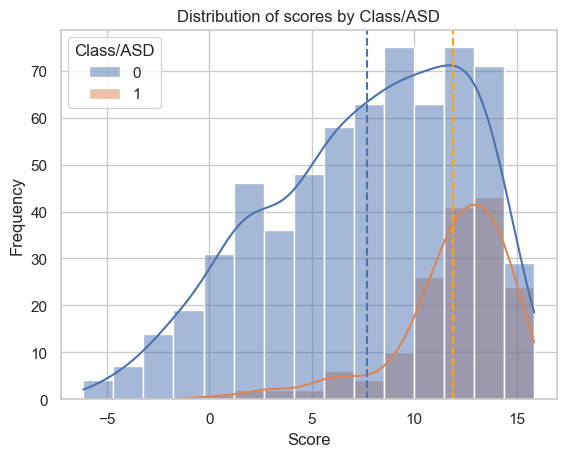

# Modeling

## A. Random Forest

Let's first test the random forest without setting the hyperperameters. 

In [33]:
rf_classifier = RandomForestClassifier()

scaler = StandardScaler()

pipe = Pipeline(steps=[("scaler", scaler), ("rf_classifier", rf_classifier)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)


Accuracy: 0.8291666666666667


In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[170,  18],
       [ 23,  29]])

Now lets use gridsearch to find the best hyperparameters.

In [62]:
import warnings

# Ignore the FutureWarning for max_features='auto'
warnings.filterwarnings("ignore", category=FutureWarning)

param_grid = {
    'rf_classifier__n_estimators': [100, 200, 300],
    'rf_classifier__max_depth': [None, 5, 10],
    'rf_classifier__min_samples_split': [2, 5, 10],
    'rf_classifier__min_samples_leaf': [1, 2, 4],
    'rf_classifier__max_features': ['auto', 'sqrt'],
    'rf_classifier__criterion': ['gini', 'entropy']
}

rf_classifier = RandomForestClassifier()

scaler = StandardScaler()

# Setup pipeline
pipe = Pipeline(steps=[("scaler", scaler), ("rf_classifier", rf_classifier)])

# Perform gridsearch
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Find accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Best Parameters: {'rf_classifier__criterion': 'gini', 'rf_classifier__max_depth': 5, 'rf_classifier__max_features': 'auto', 'rf_classifier__min_samples_leaf': 2, 'rf_classifier__min_samples_split': 10, 'rf_classifier__n_estimators': 100}
Best Score: 0.8910714285714286
Accuracy: 0.825


     Features  Importance scores
0    A1_Score           0.020597
1    A2_Score           0.025220
2    A3_Score           0.067186
3    A4_Score           0.093662
4    A5_Score           0.058494
5    A6_Score           0.110746
6    A7_Score           0.052961
7    A8_Score           0.036741
8    A9_Score           0.047861
9   A10_Score           0.018532
10        age           0.184050
11     gender           0.029559
12   jaundice           0.028751
13     austim           0.030490
14     result           0.195150


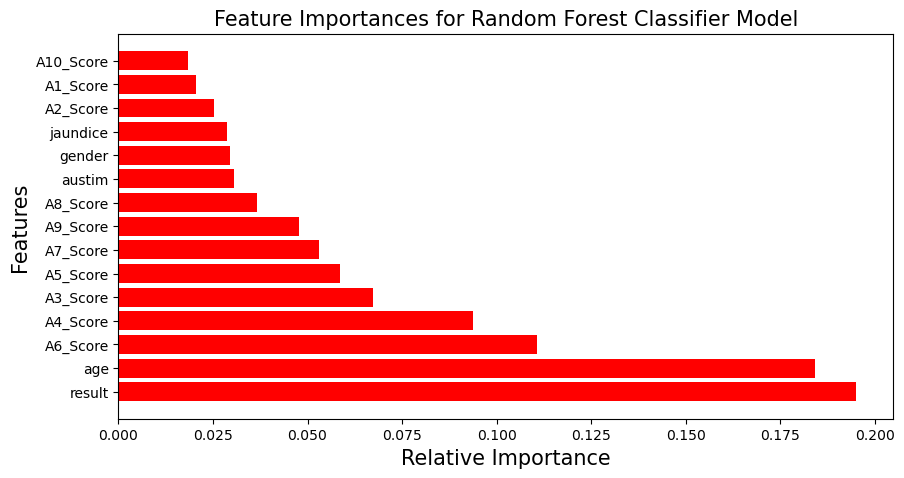

In [43]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Calculate feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns 

# Create DataFrame
tab = pd.DataFrame({'Features': feature_names, 'Importance scores': importances})

print(tab)

# Visual comparison
plt.figure(figsize=(10, 5))
_ = plt.barh(range(len(indices)), importances[indices], align='center', color='r')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Feature Importances for Random Forest Classifier Model', fontsize=15)
plt.show()

It looks like the main two features that the model is using is result and age. Result makes more logical sense since it is a score given to them based on their answers to the questionnaire. The age column is interesting but it might be that way the questionnaire was given might have biases that attract a certain age group. 

In [46]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = best_model.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8937193126022913


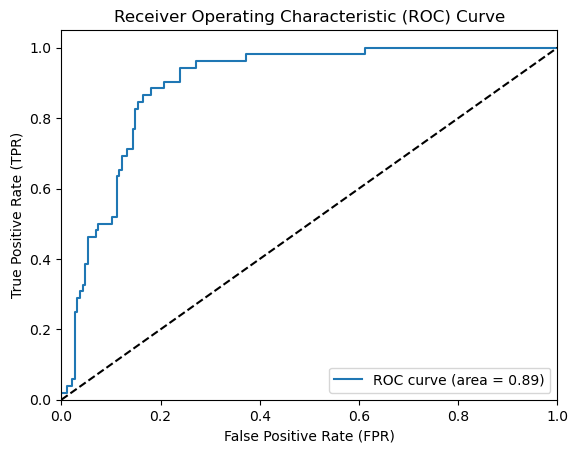

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows that the area under the curve is 0.89 which indicates that it does a pretty good job at detecting a true positive. 

## B. Gradient Boost

In [7]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier())
])

# Define the parameters
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__n_estimators': [50, 100, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Select best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
gb_accuracy

Best Parameters: {'classifier__learning_rate': 0.001, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best Score: 0.8875


0.8125

## C. Support Vector Machine

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define the parameters
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': [0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search 
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Select best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy

Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best Score: 0.875


0.8208333333333333

## D. Logistic Regression

In [9]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define the parameters
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Select best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy 

Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Score: 0.8803571428571428


0.8041666666666667

## E. K Nearest Neighbors

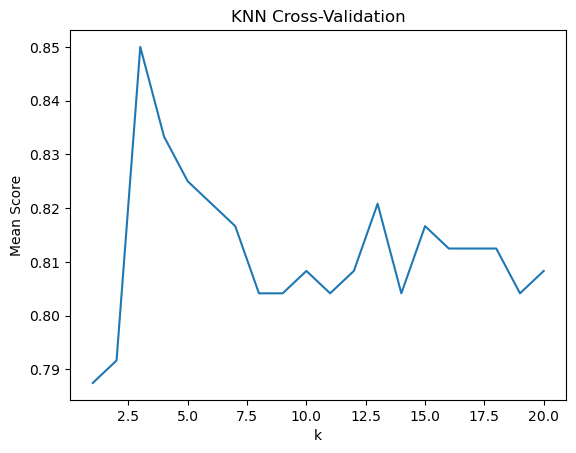

[0.7875, 0.7916666666666666, 0.85, 0.8333333333333334, 0.825, 0.8208333333333333, 0.8166666666666667, 0.8041666666666667, 0.8041666666666667, 0.8083333333333333, 0.8041666666666667, 0.8083333333333333, 0.8208333333333333, 0.8041666666666667, 0.8166666666666667, 0.8125, 0.8125, 0.8125, 0.8041666666666667, 0.8083333333333333]


In [60]:
# The values of k went want to look at 
k_values = range(1, 21)

scores = []

# Iterate over each of the values
for k in k_values:
    
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=k)) ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    scores.append(accuracy)

# Plot the scores
plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('Mean Score')
plt.title('KNN Cross-Validation')
plt.show()


The k with the highest score seems to be when k = 3

In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3)) ])
    
pipeline.fit(X_train, y_train)
    
y_pred = pipeline.predict(X_test)
    
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.85

## Compare the Models

,Model,Accuracy Score
0,Random Forest,0.825000
1,KNN,0.850000
2,SVM,0.820833
3,Logistic Reg,0.804167
4,Gradient Boost,0.812500


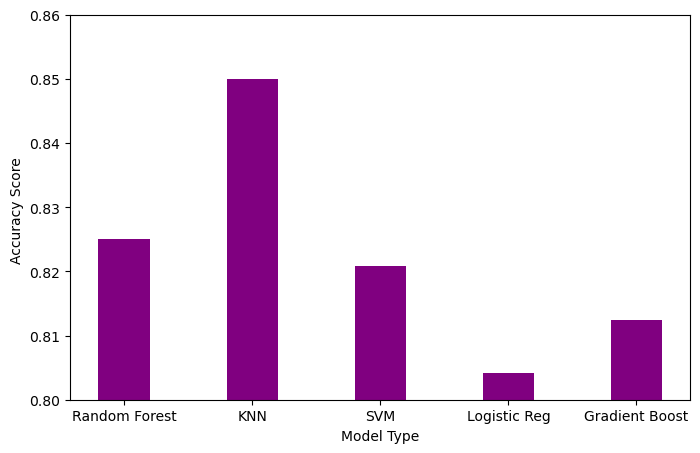

In [73]:
names = ['Random Forest', 'KNN', 'SVM', 'Logistic Reg', 'Gradient Boost']
acc_scores = [rf_accuracy, knn_accuracy, svm_accuracy, lr_accuracy, gb_accuracy]

scores = pd.DataFrame({'Model': names, 'Accuracy Score': acc_scores})


plt.figure(figsize=(8,5))
_ = plt.bar('Model', 'Accuracy Score', data=scores, color='purple', width=0.4)
plt.xlabel('Model Type')
plt.ylabel('Accuracy Score ')
plt.ylim(0.80, 0.86)
scores.head()

## Conclusion

All five of the models were within less than five percent from the highest score to the lowest. The KNN model scored the highest at 85% which might be due to it being easier to test all the different levels of k using our loop. The lowest was logistic regression at 80.4% which might just be because of the nature of our data. It is interesting how far the KNN model is ahead of the other models despite doing a gridsearch on them. 

## Future Exploration

Things that could be used to create a better model could include:<br>
    - Going through more parameters on the gridsearch for the models <br>
    - Experimenting with different kernels for the SVM model <br>

## Model Purpose

The purpose of this model would be possibly for psychological use where a clinician could have the patient input their information into this model to see if they should go get a formal diagnosis of ASD to help them make a decision using other people who are already diagnosed. 

Children or teenagers who are diagnosed can then receive the special help they need as a student to help them know how to succeed in school if that is a difficulty for them.